In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_style("whitegrid")

In [7]:
time_series = pd.read_csv("time_series.csv")

In [8]:
def predict_and_plot(df):
    df = pd.melt(df, id_vars=['Country', 'Disaster Type'], var_name='Year', value_name='Count')
    df = df[["Year", "Count"]]
    # Prepare the data
    df['ds'] = pd.to_datetime(df['Year'], format='%Y')  # Convert 'Year' column to datetime
    df.rename(columns={'Count': 'y'}, inplace=True)  # Rename 'Count' column to 'y'

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Create future dates to forecast
    future_dates = model.make_future_dataframe(periods=5, freq='Y')  # Forecast for the next 2 years with yearly frequency

    # Generate the forecasts
    forecast = model.predict(future_dates)

    # Plot the time series line with predicted values
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the actual data

    ax.plot(df['ds'], df['y'], color='#4864d7', label='Real')

    # Plot the predicted values
    ax.plot(forecast['ds'], forecast['yhat'] ,color='#8c44d7', label='Forecast')

    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

    return fig, ax

18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:18 - cmdstanpy - INFO - Chain [1] done processing
18:55:19 - cmdstanpy - INFO - Chain [1] start processing
18:55:19 - cmdstanpy - INFO - Chain [1] done processing
18:55:19 - cmdstanpy - INFO - Chain [1] start processing
18:55:20 - cmdstanpy - INFO - Chain [1] done processing
18:55:20 - cmdstanpy - INFO - Chain [1] start processing
18:55:21 - cmdstanpy - INFO - Chain [1] done processing
18:55:21 - cmdstanpy - INFO - Chain [1] start processing
18:55:22 - cmdstanpy - INFO - Chain [1] done processing
18:55:23 - cmdstanpy - INFO - Chain [1] start processing
18:55:23 - cmdstanpy - INFO - Chain [1] done processing
18:55:24 - cmdstanpy - INFO - Chain [1] start processing
18:55:24 - cmdstanpy - INFO - Chain [1] done processing
18:55:25 - cmdstanpy - INFO - Chain [1] start processing
18:55:25 - cmdstanpy - INFO - Chain [1] done processing
18:55:26 - cmdstanpy - INFO - Chain [1] start processing
18:55:26 - cmdstanpy - INFO - Chain [1]

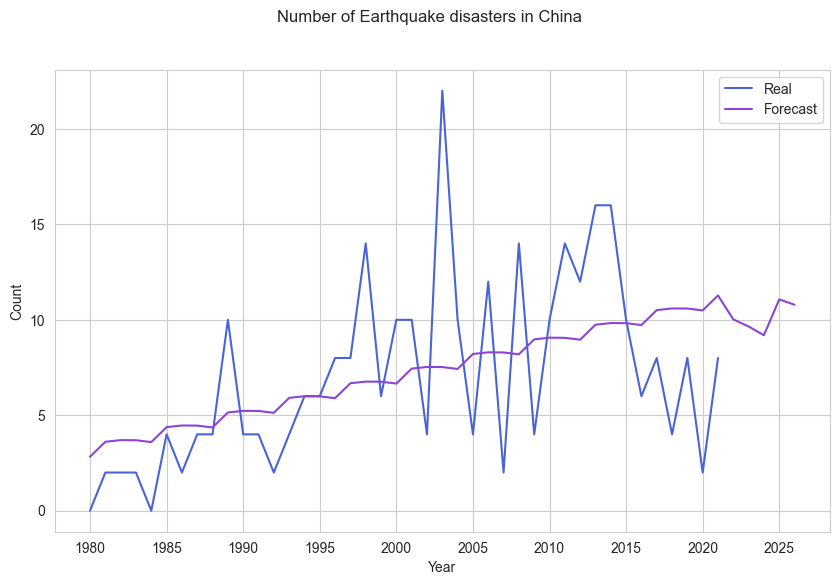

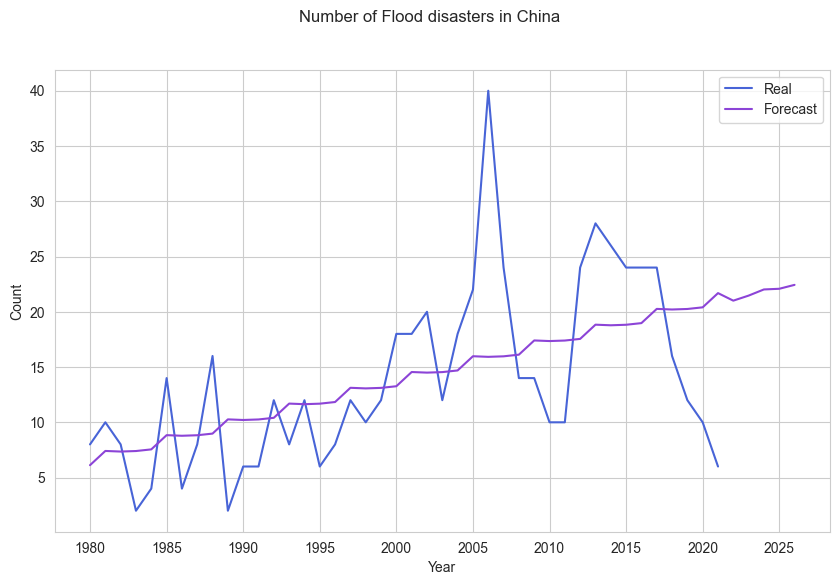

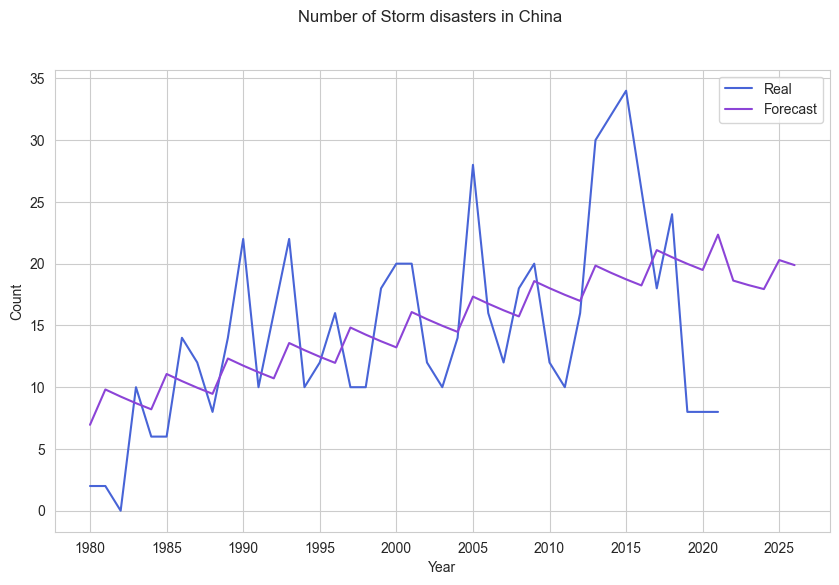

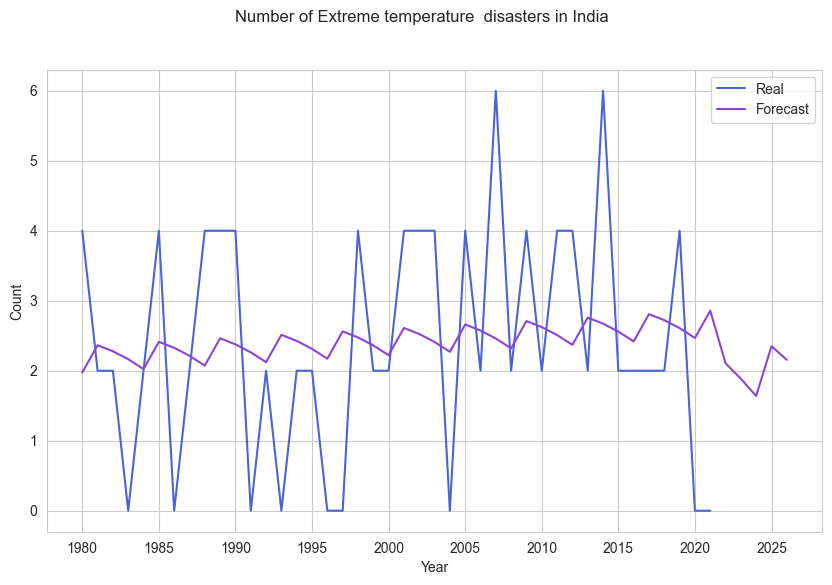

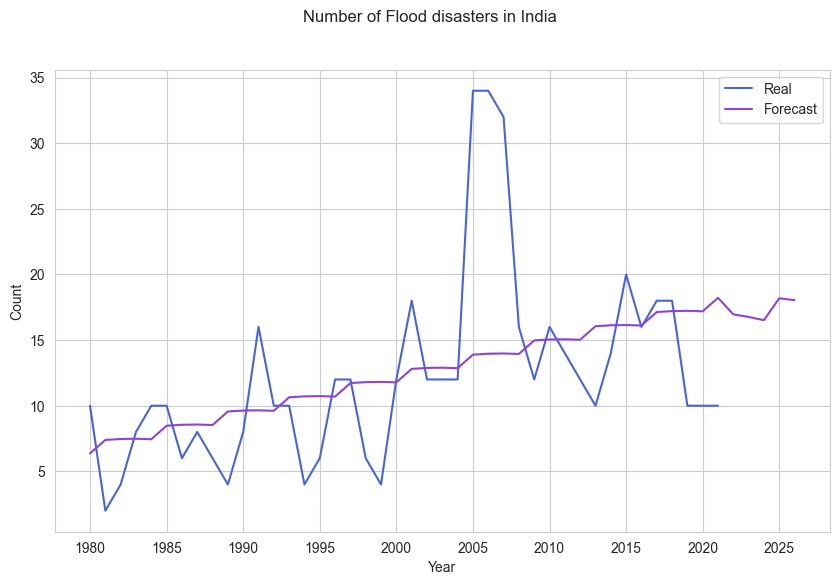

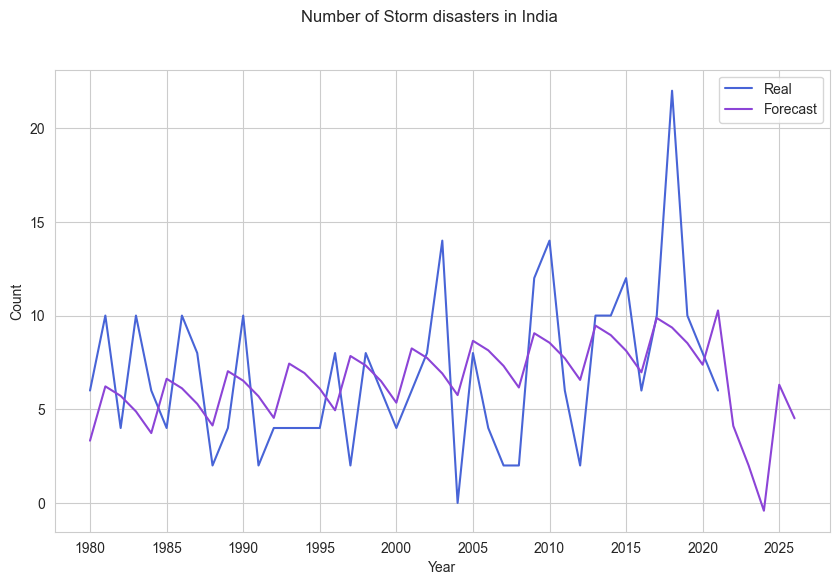

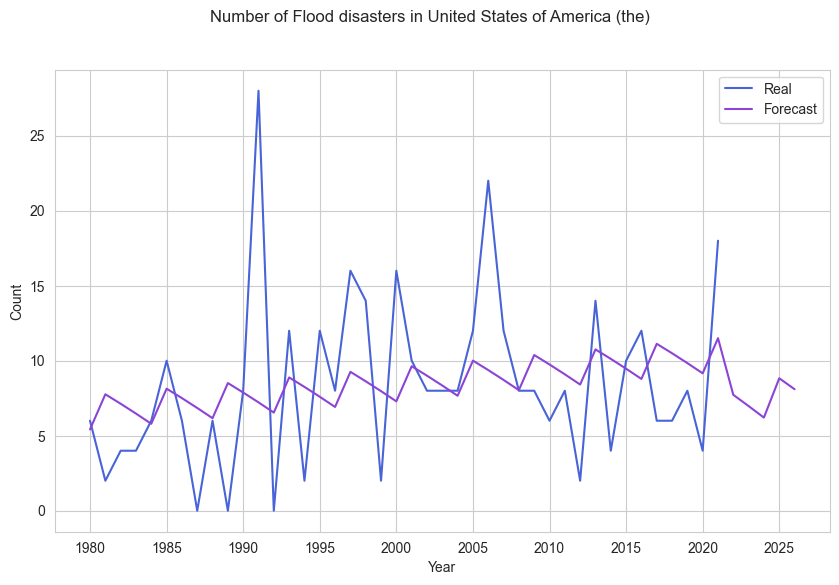

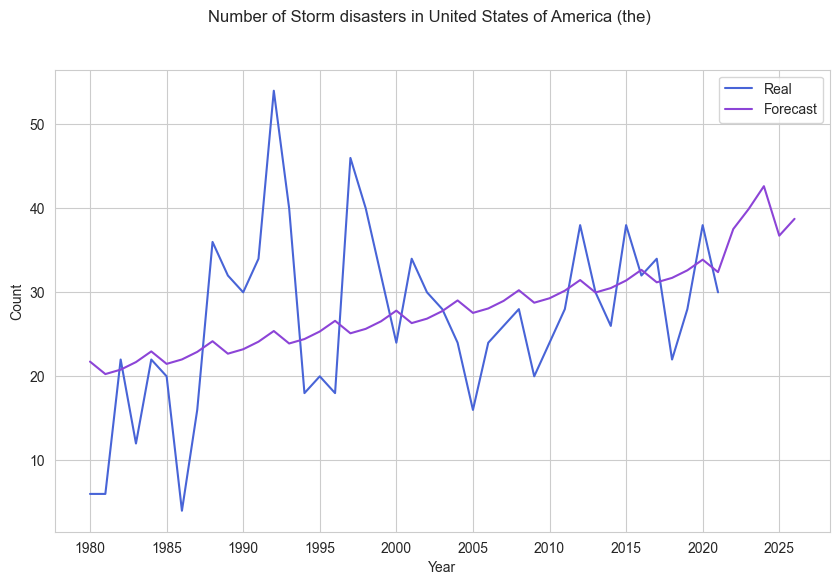

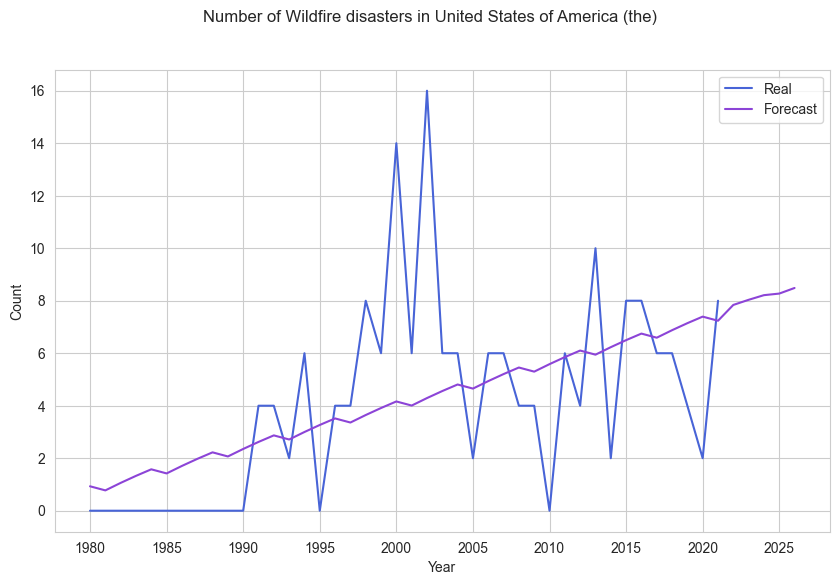

In [9]:
for i in range(len(time_series)):
    country = time_series.iloc[i, 0]
    disaster_type = time_series.iloc[i, 1]
    df = time_series.iloc[i:i+1, :]
    fig, ax = predict_and_plot(df)
    fig.suptitle(f"Number of {disaster_type} disasters in {country}")
    plt.savefig("results_images/" + country + "_" + disaster_type + ".png", dpi=300)